In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')
sns.set_style('whitegrid')

In [9]:
Data = pd.read_csv('../data/processed/Data.csv')


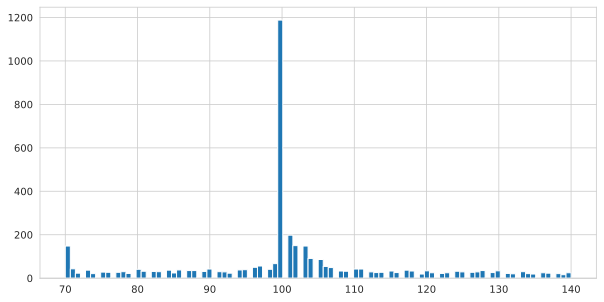

In [10]:
# Plot datos con filtro, eliminadas las lecturas bjas y altas de glucosa en sangre
Data['BWZ BG Input (mg/dL)'].hist(figsize=(10, 5), bins=100);

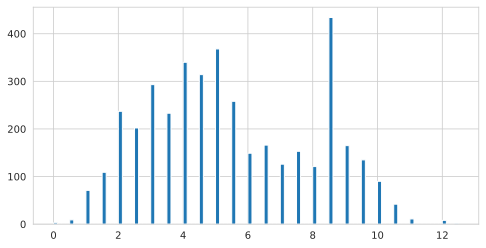

In [11]:
#Carbohidrados tomados por raciones
Data['BWZ Carb Input (exchanges)'].hist(figsize=(8, 4), bins=100);

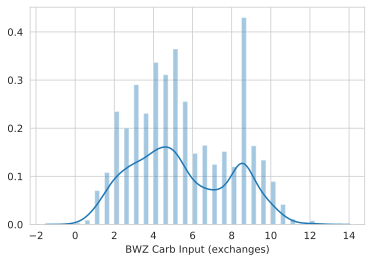

In [12]:
sns.distplot(Data['BWZ Carb Input (exchanges)'], bins=50);

In [13]:
# Ordenado por hora para visualización
Data['hour'] = Data['hour'].astype(int)
by_hour = Data.sort_values('hour')
by_hour


,Unnamed: 0,Unnamed: 0.1,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U),day_of_month,day_of_week,month_of_year,hour
2169,2169,8107,0.80,5.9,0.92,50.0,6.5,100.0,0.0,5.9,0.0,0.0,9,6,4,0
2511,2511,12909,0.90,2.7,0.92,50.0,3.0,102.0,0.0,2.7,3.1,0.0,5,0,6,0
2527,2527,13091,0.90,5.5,0.92,50.0,6.0,101.0,0.0,5.5,0.0,0.0,5,6,2,0
1811,1811,2242,0.80,1.8,0.92,50.0,2.0,100.0,0.0,1.8,0.0,0.0,2,5,6,0
787,787,18242,0.80,7.6,0.90,50.0,8.5,132.0,0.0,7.6,0.0,0.0,15,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,3002,20969,0.55,6.9,0.80,50.0,8.5,132.0,0.2,6.8,0.1,0.1,11,2,5,23
2200,2200,8611,0.70,6.0,0.80,50.0,7.5,91.0,0.0,6.0,0.0,0.0,21,0,8,23
555,555,14298,0.75,4.8,0.80,50.0,6.0,134.0,0.0,4.8,0.0,0.0,9,1,7,23
951,951,20875,0.75,2.4,0.80,50.0,3.0,100.0,0.0,2.4,0.0,0.0,4,4,10,23
